
# Example: Linear Regression using NumPy

This is example of applying linear regression for a column in a data frame. Here we are using London weather data from 1956 to 2019 to estimate if the weather in July is increasing. (July is usually the hottest month.)

Source: [Regression Plots with Pandas and Numpy](https://towardsdatascience.com/regression-plots-with-pandas-and-numpy-faf2edbfad4f)

---



## Dependencies

In [12]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


---
Plot regression training data along with linear fit.

## Get Source Data

In [13]:
# grab london weather data
weather = pd.read_csv('https://raw.githubusercontent.com/alanjones2/dataviz/master/londonweather.csv')
weather

,Year,Month,Tmax,Tmin,Rain,Sun
0,1957,1,8.7,2.7,39.5,53.0
1,1957,2,9.0,2.9,69.8,64.9
2,1957,3,13.9,5.7,25.4,96.7
3,1957,4,14.2,5.2,5.7,169.6
4,1957,5,16.2,6.5,21.3,195.0
...,...,...,...,...,...,...
743,2018,12,10.7,5.2,60.6,40.3
744,2019,1,7.6,2.0,33.2,56.4
745,2019,2,12.4,3.3,34.2,120.2
746,2019,3,13.1,5.8,49.6,119.0


Get a subset of the data, namely just the month of July:

In [14]:
# summer month in London is July
july = weather.query('Month == 7')
july

,Year,Month,Tmax,Tmin,Rain,Sun
6,1957,7,22.5,13.8,87.0,152.3
18,1958,7,21.7,12.9,51.9,190.5
30,1959,7,24.7,13.3,86.5,276.9
42,1960,7,20.1,12.4,67.2,139.7
54,1961,7,22.1,12.1,26.2,180.0
...,...,...,...,...,...,...
690,2014,7,25.8,15.0,50.0,246.4
702,2015,7,23.7,13.8,71.8,189.7
714,2016,7,24.0,14.5,16.0,182.8
726,2017,7,23.8,14.9,90.0,178.0


Add a year index to the July dataframe. We will use this index for the maximum temperature linear regression. The index is used as [polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) does not work well when `x` and `y` are different by orders of magnitude. 

In [15]:
july.insert(0, 'Ix', range(0, len(july)))
july

,Ix,Year,Month,Tmax,Tmin,Rain,Sun
6,0,1957,7,22.5,13.8,87.0,152.3
18,1,1958,7,21.7,12.9,51.9,190.5
30,2,1959,7,24.7,13.3,86.5,276.9
42,3,1960,7,20.1,12.4,67.2,139.7
54,4,1961,7,22.1,12.1,26.2,180.0
...,...,...,...,...,...,...,...
690,57,2014,7,25.8,15.0,50.0,246.4
702,58,2015,7,23.7,13.8,71.8,189.7
714,59,2016,7,24.0,14.5,16.0,182.8
726,60,2017,7,23.8,14.9,90.0,178.0


Plot the maximum temperatures for July since 1957.

Text(0.5, 1.0, 'London July Maximum Temperatures')

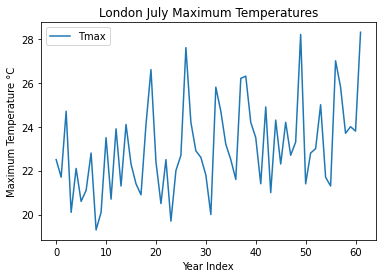

In [16]:
ax = july.plot(x='Ix', y='Tmax')
ax.set_xlabel('Year Index')
ax.set_ylabel('Maximum Temperature °C')
ax.set_title('London July Maximum Temperatures')

Fit a linear regression (degree = 1) to year index versus maximum temperature:

Copy July data frame as we are about to insert the regression data.

In [17]:
# least squares polynomial fit (returns polynomial coefficients)
pc = np.polyfit(x = july['Ix'], y = july['Tmax'], deg = 1)
pc

array([ 0.04808743, 21.61075269])

In [18]:
# convert to pandas 1-dimensional polynomial so we can fit to dataframe
f = np.poly1d(pc)
f

poly1d([ 0.04808743, 21.61075269])

Copy July as we are about to append to it.

In [19]:
july_regress = july.loc[:,['Ix', 'Year', 'Tmax']]
july_regress

,Ix,Year,Tmax
6,0,1957,22.5
18,1,1958,21.7
30,2,1959,24.7
42,3,1960,20.1
54,4,1961,22.1
...,...,...,...
690,57,2014,25.8
702,58,2015,23.7
714,59,2016,24.0
726,60,2017,23.8


Lets calculate the number of columns in the data frame so we don't need to hard code the index to add regression data.

In [20]:
cols = len(july_regress.columns)
cols

3

Insert regression data to the end of the copied data frame.

In [21]:
# insert linear regression polynomial
july_regress.insert(loc=cols, column='Treg', value=f(july['Ix']))
july_regress

,Ix,Year,Tmax,Treg
6,0,1957,22.5,21.610753
18,1,1958,21.7,21.658840
30,2,1959,24.7,21.706928
42,3,1960,20.1,21.755015
54,4,1961,22.1,21.803102
...,...,...,...,...
690,57,2014,25.8,24.351736
702,58,2015,23.7,24.399824
714,59,2016,24.0,24.447911
726,60,2017,23.8,24.495999


Plot the results by:

- plotting the temperature versus year index
- adding the regression line (in red)

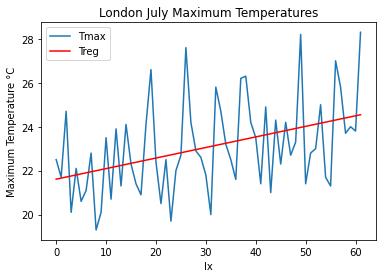

In [22]:
ax = july_regress.plot(x='Ix', y='Tmax')
ax.set_title('London July Maximum Temperatures')
ax.set_ylabel('Maximum Temperature °C')
ax.set_xlabel('Year Index')
july_regress.plot(x='Ix', y='Treg', color='red', ax=ax)

From this graph it is easy to see the steady July maximum temperature increase from 1956 till 2019.